In [8]:
import os
import sys 
sys.path.append(os.path.abspath('..'))
import matplotlib.pyplot as plt
from utils import create_directory, plot_simulations, plot_training_log
import json

In [9]:
import motornet as mn
from task import CentreOutFF
from policy import Policy
import torch as th
import numpy as np

In [2]:
data_dir = create_directory('2023-09-26')
model_num = 0

weight_file = os.path.join(data_dir, f"model{model_num}_weights")
log_file = os.path.join(data_dir, f"model{model_num}_log.json")
cfg_file = os.path.join(data_dir, f"model{model_num}_cfg.json")

Directory '/Users/mahdiyarshahbazi/Documents/Data/2023-09-26' already exists.


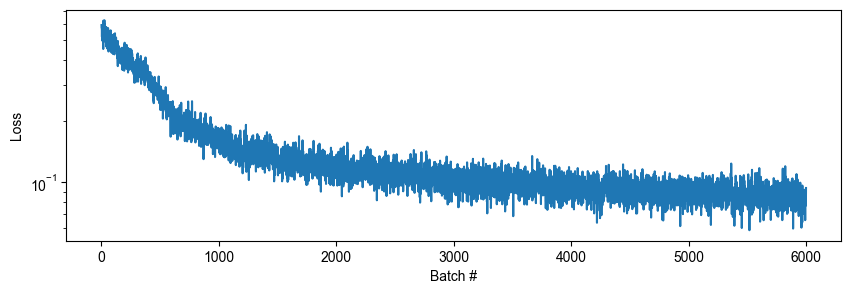

In [3]:
# retrieve and plot training history
with open(log_file, 'r') as file:
    loaded_training_log = json.load(file)

fig = plt.figure(figsize=(10,3))
plt.rcParams['font.family'] = "Arial"
ax = plot_training_log(log=loaded_training_log)
fig.savefig(data_dir+f'/model{model_num}_loss.pdf',bbox_inches='tight')

In [11]:
import motornet as mn
# Define task and the effector
effector = mn.effector.RigidTendonArm26(muscle=mn.muscle.ReluMuscle()) 
env = CentreOutFF(effector=effector,max_ep_duration=1.,name='env',)
obs, info = env.reset(condition = "train",ff_coefficient=0, options={'batch_size':1})

In [28]:
# test model

# load configuration
with open(cfg_file,'r') as file:
    cfg = json.load(file)

# effector
muscle_name = cfg['effector']['muscle']['name']
timestep = cfg['effector']['dt']
muscle = getattr(mn.muscle,muscle_name)()
effector = mn.effector.RigidTendonArm26(muscle=muscle,timestep=timestep)

proprioception_delay = cfg['proprioception_delay']*cfg['dt']
vision_delay = cfg['vision_delay']*cfg['dt']

ReluMuscle()

In [ ]:
task_type = cfg['Task']['name']

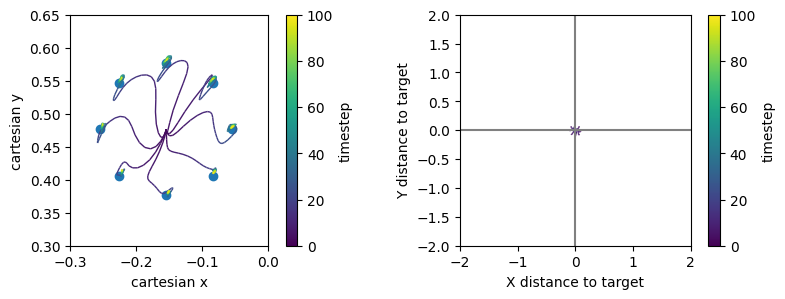

In [64]:
# ==========
# Evaluation
# ==========
batch_size = 8
# initialize batch
h = policy2.init_hidden(batch_size=batch_size)
obs, info = env2.reset(condition = "test", options={'batch_size':batch_size})
terminated = False

# initial positions and targets
xy = [info["states"]["fingertip"][:, None, :]]
tg = [info["goal"][:, None, :]]

# simulate whole episode
while not terminated:  # will run until `max_ep_duration` is reached
  action, h = policy2(obs, h)
  obs, reward, terminated, truncated, info = env2.step(action=action)

  xy.append(info["states"]["fingertip"][:, None, :])  # trajectories
  tg.append(info["goal"][:, None, :])  # targets

# concatenate into a (batch_size, n_timesteps, xy) tensor
xy = th.detach(th.cat(xy, axis=1))
tg = th.detach(th.cat(tg, axis=1))

plot_simulations(xy=xy, target_xy=tg)
